# Growth and the (optimal) ribosomal content of cells



#### What to improve/add

- add more data, particularly about ribosomal contant vs growth.
- introduce simpler consideration first, with scenario where cells consist only of ribosomes and RNAP. Consider different parts of translation and transcription (RNAP making rRNA, mRNA for ribosomes and RNAP), ribosomes translating proportional to mRNA abundance. Consider costs of mRNA synthesis. How important is it in terms of costs that several ribosomes use one mRNA to translate?

In [1]:
#start python session
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import *
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


# Growth laws

Simple consideration why an approx. linear relation between ribosome abundance and growth rate means optimal allocation of ressources to ribosomes and other proteins. Arguments do not consider how the cell manage to obtain an optimal abundance of ribosomes, which is an obivous next step to think about more carefully.

In publications from Terry Hwa's lab together with Matt Scott and Stefan Klump similar considerations have been done, consider particularly Scott et al 2014. However I found the presentations in their manuscript not the easiest to follow since it first starts with the 'ribosome line' or other phenomenological relations as given (e.g. ribosome fraction increases proportional with growth rate). Only much later on model based rationalizations are given why these relation  might be useful for the cell. I think it is much easier to understand the relations (or growth-laws) when talking immediatly about nutrient levels and the limitation of translation. With the relations being the consequence of a regulation scheme ensuring an optimal allocation into ribosomes. Furthermore, I think the specific illustration of optimal ribosome allocation vs alternative simpler allocation strategies presented here is helpful to illustrate how important a proper allocation strategy is to maximize growth. 

Note: To prevent the introduction of new notation I started followingg closely the notation used in Scott et al 2014. But I probably was not always consistent. 

## Ribosomes make all proteins

To start, let's consider the synthesis of total protein mass $M$ by the ribosomes. The synthesis of proteins depends on the number of ribosomes $N_r$ and their translation speed (how many new AA are synthesized per time).

$$ \frac{dM}{dt}= k_R N_{r}$$

Here, we take 1AA as basic unit for protein mass, so there is no extra conversion factor (and the translation speed $k_R$ has the unit AA/time.

In a steady state where the composition of the cell is not changing, we thus have for the growth rate:

$$ \lambda=\frac{dM}{dt}/M=k_R N_{r}/M$$

With the total mass of ribosomes $M_R=N_R m_r$ we can rewrite:

$$ \lambda=\gamma M_R/M=\gamma\phi_R $$

with $\phi_R$ being the ribosomal protein mass fraction [proportional to the easier to masure fraction total RNA to total protein]. $\gamma\equiv k_R/m_R$ denotes the translation efficiency and has the unit of a rate (1/time). $m_R$ is 7459 AA for E.coli. 

Note: It is still better to use the term efficiency instead of rate here  since it might be the consequence of something more complex and not a simple chemical process described by a constant reaction rate. For example, when using chloramphenicol what seems to happen is that some ribosomes are stopping completely while others are still translating with regular translation speed. A chloramphenicol depemendent $\gamma$ is describing the total effect of chloramphenical on translation and not necessarily the effect of chloramphenicol on single ribosomes.

This relation should in general be true in steady state, but does not necessarily give a linear relation between ribosom fraction and growth rate: For different growth rates (in different enviornments), the cellular composition is changing and thus translation efficiency $\gamma$ is also expected to change. 

In particular we expect translation efficiency to go down if nutrient levels within the cells are falling too much (e.g. not sufficient charged tRNAs to ensure smooth translation). Let's simplify and consider only one type of nutrient source, like a pool of amino acids (or charged tRNAs) with concentration $a$. We expact a sigmodial dependence of translation efficiency when the availability of chareged tRNA varies. For example by a Michaelis Menten type:

$$\gamma=\gamma(a)=\gamma_{max}\cdot\frac{a}{a+a_0}$$ 

Ribosomes are translating full power for $a>>a_0$, but translation slows down substantially when $a$ falls below $a$.

Note: To have the units comparable we here take $a$ in the units of charged tRNA per protein, not per cell mass (Not a problem since protein per cell is not changing).
Note: Translation is not a simple chemical reaction and other functional forms might be more realistic, e.g. a hill curve with a steeper increase of translation around $a_0$. The advantage using a Michaelis Menten type is that we can analytically handle the steady state.
Note: a0 can be estimated from studies investigating how translation changes with charged tRNA levels in the cell. Particularly, there are studies where single tRNA species have been depleted and its effect on translation speed have been quantified.

Spoiler alert: The linear relation between growth rate and ribosome fraction, a hall-mark of the growth-laws' and obsered over a wide range of growth conditions only follows when a0 is low. In the following we  consider the nutrient levels in the cell in more detail and show that optimal growth rates are obtained when nutrient levels are maintained at sufficiently high levels.

## Nutrient levels within the cell

The nutrient levels within the cell (think of it as charged tRNA) is givene by a balance of nutrient uptake and consumption by the translating ribosomes. 

$$\frac{d A}{dt}=J_{in}-\beta \frac{dM}{dt}$$

Here, $J_{in}$ describeds the nutrient influx (how nutrient uptake leads to new charged tRNA). Since we measure  theinternal nutrient pool in units of charged tRNA and protein mass in units of amino acid we can set the conversion factor $\beta$ translating the consumption of internal nutrients to newly translated protein mass to 1. For the concentration of nutrients within the cell, $a=A/M$ we get:

$$\frac{d a}{dt}=J_{in}/M-\frac{1}{M}\frac{dM}{dt}(\beta+a)=J_{in}/M-\lambda \beta-\lambda a$$

The last term describes dilution of the amino acid concentrations by cell growth. The influx of new nutrients depends on the abundance of proteins taking care of nutrient influx. If we more specifically describe by $M_a$ the proteins required for the uptake of nutrients and by $k_a$ the rate, then we have $J_{in}=k_a M_a$. Or $J_{in}/M=k_a\phi_N $ with $\phi_N=M_a/M$.

In steady state, the nutrient concentration is thus given by:

$$a=\beta\left(\frac{k_a\phi_N}{\beta\lambda}-1\right)\equiv \beta \left(\frac{\nu \phi_N}{\lambda}-1\right)$$

with the "nutrient efficiency" defined as $\nu=k_a/\beta$.

Note: Nutrient turnover in the cell is typically large compared to dilution and thus this relation often simplifies to the relation $\lambda=\nu \phi_N$. Thus, when changing enviornmental conditions without changing $\nu$ (like by chloramphenicol as in Scott et al) one sees a linear relation between ribosome fraction and growth rate. However, we are interested here in all kinds of possible steady states, including those were nutrient concentrations reach very high levels. We thus include the dilution term in our further considerations.

Note: In pincriple, nutrient levels can be controlled in addition by some negative feedback. Too high nutrient levels can for example lead to a decrease of protein activity for example (drop of $k_a$). We are not including this here as we only want to illustrate how optimal steady state growth rates are accomplished.

Note: It is important to realize that $M_k$ represents not only one type of enzyme (like a specific uptake protein) but stands for the a pool of enzymes needed to charge tRNA (including metabolic enzymes and what ever is needed to synthesize the AA). Accordingly, $k_a$ is not a simple enzymatic rate. 

## Steady state growth rates

The steady state growth rates are a result of combinding the equations for nutrient levels and growth introduced above:
$$a=\beta \left(\frac{\nu \phi_N}{\lambda}-1\right)$$ and 
$$\lambda=\gamma_{max}\frac{a}{a+a_0}\phi_R$$

For the case of translation showing a Miachelis Menten dependence on nutrient levels (as stated above) this is just the solution of a quadratic equation. 

We can then consider specifically how growth is changing when allocation parameters (particularly the ribosomal content) are changing. We specifically consider the following three (simple) regulation scenarios and compare how well they compare with what the cell is doing across growth conditions. 

### Scenario 1: Cell is adjusting the ribosome fraction to optimize growth.

We can solve the equations for different ribosome abundance levels $\phi_R$ and find the  abundance levels for which growth-rate becomes optimal (given the other parameters are fixed). Spoiler alert: this elegant regulation scheme matches very well with the observations.

### Scenario 2: Cell is maintaining a constant translation rate. 

We can solve the equations for different ribosome abundance levels and find the ribosome abundance levels such that translation rate, $\gamma=\gamma_{max}\frac{a}{a+a_0}$, is constant.

### Scenario 3: Cell is maintaining a fixed ribosomal content. 

Finally, we can solve the equations and consider how growth-rate is changing when ribosomal content is not adjusted but constant (not changing when other parameters are changing).

In the following we outline the code how to get these solutions, and then we analyze how growth is changing for the different scenarios and when the major physiological parameters (nutrient efficiency and translation speed) are varied. 




In [2]:
#find optimal ribosome allocation
#can be skiped since I copied the solution in the next cells (I calculated also by hand but got too lazy after a while)

#caluclation steady state solution for translation following a michaeelis mentend dependence on precursor levesl
#start symbols
symbolsToDelete = ('lam')
var('lam')
var('beta')
var('nu')
var('phiR')
var('gamma_max')
var('a_0')
var('phiO')
var('a_sol1')
var('a_sol2')
var('mpc')
#lambda*(nu*phiP+beta*phiR*gamma0)/(Km_nu-beta)-phiR*gamma0*nu*phiP
#start with simple model were amino acid levels are only reduced by growth. Slow down in translation follows simple Michaelis Menten
solve((lam**2)+lam*(beta*nu*(1-phiR-phiO)+beta*phiR*gamma_max)/(a_0-beta)-gamma_max*beta*nu*phiR*(1-phiR-phiO)/(a_0-beta), lam)

##we can then take these solutions and look at the derivative in phiR (robosomal content)
##calculate derivative 
grsolution1=(-beta*(gamma_max*phiR - nu*phiO - nu*phiR + nu) + sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR**2 + 2*beta*gamma_max*nu*phiO*phiR + 2*beta*gamma_max*nu*phiR**2 - 2*beta*gamma_max*nu*phiR + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiR - 2*beta*nu**2*phiO + beta*nu**2*phiR**2 - 2*beta*nu**2*phiR + beta*nu**2)))/(2*(a_0 - beta))
dlambda_dphiR=diff(grsolution1,phiR,1)

##print(dlambda_dphiR)
##solve for derivative equals zero to find the optimal ribosome allocation
##this step takes a few seconds
##the optimal ribosome fraction is determined by the derivative being 0.
extreme_growth_solutions=solve(dlambda_dphiR,phiR)
print("solution: growth for optimal ribosome allocation")
#print(extreme_growth_solutions)

###

solution: growth for optimal ribosome allocation


In [3]:
extreme_growth_solutions[0]

-(2*a_0*gamma_max*nu*phiO - 2*a_0*gamma_max*nu - beta*gamma_max*nu*phiO + beta*gamma_max*nu - beta*nu**2*phiO + beta*nu**2 - gamma_max*phiO*sqrt(a_0*beta*gamma_max*nu) + gamma_max*sqrt(a_0*beta*gamma_max*nu) + nu*phiO*sqrt(a_0*beta*gamma_max*nu) - nu*sqrt(a_0*beta*gamma_max*nu))/(4*a_0*gamma_max*nu - beta*gamma_max**2 - 2*beta*gamma_max*nu - beta*nu**2)

In [4]:
#find  ribosome allocation for fixed precursor levels
#can be skiped since I copied the solution in the next cells.


symbolsToDelete = ('lam')
symbolsToDelete = ('mpc')
var('lam')
var('beta')
var('nu')
var('phiR')
var('gamma_max')
var('a_0')
var('phiO')
var('a_sol1')
var('a_sol2')
var('mpc')

#constant level 
solve((mpc**2)+mpc*beta*(-1*nu*(1-phiR-phiO)/(phiR*gamma_max)+1)-nu*(1-phiR-phiO)*a_0*beta/(gamma_max*phiR), mpc)

#we can take this solution and find allocation parameters for which precursor concentration is fixed.
#mpc1sol=(-beta*(gamma_max*phiR - nu*phiO - nu*phiR + nu) + sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR**2 - 2*beta*gamma_max*nu*phiO*phiR - 2*beta*gamma_max*nu*phiR**2 + 2*beta*gamma_max*nu*phiR + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiR - 2*beta*nu**2*phiO + beta*nu**2*phiR**2 - 2*beta*nu**2*phiR + beta*nu**2)))/(2*gamma_max*phiR)
#mpc2sol=-(beta*(gamma_max*phiR - nu*phiO - nu*phiR + nu) + sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR**2 - 2*beta*gamma_max*nu*phiO*phiR - 2*beta*gamma_max*nu*phiR**2 + 2*beta*gamma_max*nu*phiR + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiR - 2*beta*nu**2*phiO + beta*nu**2*phiR**2 - 2*beta*nu**2*phiR + beta*nu**2)))/(2*gamma_max*phiR)
var('avaluec')

#copy in constant solution
mpc1solminconstv=(-beta*(gamma_max*phiR + nu*phiO + nu*phiR - nu) + sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR**2 + 2*beta*gamma_max*nu*phiO*phiR + 2*beta*gamma_max*nu*phiR**2 - 2*beta*gamma_max*nu*phiR + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiR - 2*beta*nu**2*phiO + beta*nu**2*phiR**2 - 2*beta*nu**2*phiR + beta*nu**2)))/(2*gamma_max*phiR)-avaluec
mpc2solminconstv=-(beta*(gamma_max*phiR + nu*phiO + nu*phiR - nu) + sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR**2 + 2*beta*gamma_max*nu*phiO*phiR + 2*beta*gamma_max*nu*phiR**2 - 2*beta*gamma_max*nu*phiR + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiR - 2*beta*nu**2*phiO + beta*nu**2*phiR**2 - 2*beta*nu**2*phiR + beta*nu**2)))/(2*gamma_max*phiR)-avaluec

#mpcl1 = lambdify([phiR,gamma_max,nu,a_0,beta,phiO], mpc1sol, "numpy")
#mpcl2 = lambdify([phiR,gamma_max,nu,a_0,beta,phiO], mpc2sol, "numpy")

#mpcl1minconstv = lambdify([phiR,gamma_max,nu,a_0,beta,phiO], mpc1solminconstv, "numpy")
#mpcl2minconstv = lambdify([phiR,gamma_max,nu,a_0,beta,phiO], mpc2solminconstv, "numpy")

#find solution
fixconst1=solve(mpc1solminconstv,phiR)
fixconst2=solve(mpc2solminconstv,phiR)
display(fixconst1)
display(fixconst2)

[beta*nu*(-a_0*phiO + a_0 - avaluec*phiO + avaluec)/(a_0*beta*nu + avaluec**2*gamma_max + avaluec*beta*gamma_max + avaluec*beta*nu)]

[beta*nu*(-a_0*phiO + a_0 - avaluec*phiO + avaluec)/(a_0*beta*nu + avaluec**2*gamma_max + avaluec*beta*gamma_max + avaluec*beta*nu)]

In [5]:
#run this cell to have the growth optimal solution ready etc
#definitions of functions to plot things in the following

colorPC='k'#'#4A71B7'
colorPR='k'#'#70AD44'
colorGR='k'
colorGRopt='orange'
colorPCcon='magenta'
alphac=0.8




def grsolution(beta,gamma_maxin,nu,a_0,phiO,phiR,fracactive):  
 pf_translationrate=3600./7459. #translation to hour....
 gamma_max=gamma_maxin*fracactive*pf_translationrate
 grsol1s=((-beta*(gamma_max*phiR - nu*phiO - nu*phiR + nu) + np.sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR*phiR + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR*phiR + 2*beta*gamma_max*nu*phiO*phiR + 2*beta*gamma_max*nu*phiR*phiR - 2*beta*gamma_max*nu*phiR + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiR - 2*beta*nu*nu*phiO + beta*nu*nu*phiR*phiR - 2*beta*nu*nu*phiR + beta*nu*nu)))/(2*(a_0 - beta)))
 
 #grsol1s=((-beta*(gamma_max*phiR - nu*phiO - nu*phiR + nu) + np.sqrt(beta*(-4*a_0*gamma_max*nu*phiO*phiR - 4*a_0*gamma_max*nu*phiR**2 + 4*a_0*gamma_max*nu*phiR + beta*gamma_max**2*phiR*phiR + 2*beta*gamma_max*nu*phiO*phiR + 2*beta*gamma_max*nu*phiR*phiR - 2*beta*gamma_max*nu*phiR + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiR - 2*beta*nu*nu*phiO + beta*nu*nu*phiR*phiR - 2*beta*nu*nu*phiR + beta*nu*nu)))/(2*(a_0 - beta)))
    
 a_solution1=beta*(nu*(1-phiO-phiR)/grsol1s-1)
 return [grsol1s,a_solution1,gamma_max*a_solution1/(a_solution1+a_0)/fracactive/pf_translationrate]

#solution for optimal growht
#output: fraction ribosomes, precursor level, growth-rate
def optphiR_solution(beta,gamma_maxin,nu,a0,phiO,fracactive):
 pf_translationrate=3600./7459.
 gamma_max=gamma_maxin*fracactive*pf_translationrate
 phiRopt=-(2*a0*gamma_max*nu*phiO - 2*a0*gamma_max*nu - beta*gamma_max*nu*phiO + beta*gamma_max*nu - beta*nu*nu*phiO + beta*nu**2 - gamma_max*phiO*np.sqrt(a0*beta*gamma_max*nu) + gamma_max*np.sqrt(a0*beta*gamma_max*nu) + nu*phiO*np.sqrt(a0*beta*gamma_max*nu) - nu*np.sqrt(a0*beta*gamma_max*nu))/(4*a0*gamma_max*nu - beta*gamma_max*gamma_max - 2*beta*gamma_max*nu - beta*nu**2)
 #print((beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))
 #print(np.sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))
 #phiRopt=optimalgrowth_sol1=-(2*a0*gamma_max*nu*phiO - 2*a0*gamma_max*nu - beta*gamma_max*nu*phiO + beta*gamma_max*nu - beta*nu**2*phiO + beta*nu**2 - gamma_max*phiO*sqrt(a0*beta*gamma_max*nu) + gamma_max*sqrt(a0*beta*gamma_max*nu) + nu*phiO*sqrt(a0*beta*gamma_max*nu) - nu*sqrt(a0*beta*gamma_max*nu))/(4*a0*gamma_max*nu - beta*gamma_max**2 - 2*beta*gamma_max*nu - beta*nu**2)
 grsol1s=((-beta*(gamma_max*phiRopt - nu*phiO - nu*phiRopt + nu) + np.sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))/(2*(a0 - beta))) 
 #grsol1s=((-beta*(gamma_max*phiRopt - nu*phiO - nu*phiRopt + nu) + sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt**2 + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max**2*phiRopt**2 + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt**2 - 2*beta*gamma_max*nu*phiRopt + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiRopt - 2*beta*nu**2*phiO + beta*nu**2*phiRopt**2 - 2*beta*nu**2*phiRopt + beta*nu**2)))/(2*(a0 - beta))) 
 a_solution1=beta*(nu*(1-phiO-phiRopt)/grsol1s-1)
 translc=grsol1s*0+gamma_max*a_solution1/(a_solution1+a0)/fracactive/pf_translationrate
 return[phiRopt,a_solution1,grsol1s,translc]

def constphiR_solution(beta,gamma_maxin,nu,a0,phiO,phiRin,fracactive):
 pf_translationrate=3600./7459.
 gamma_max=gamma_maxin*fracactive*pf_translationrate
 phiRopt=phiRin
 #-(2*a0*gamma_max*nu*phiO - 2*a0*gamma_max*nu - beta*gamma_max*nu*phiO + beta*gamma_max*nu - beta*nu*nu*phiO + beta*nu**2 - gamma_max*phiO*np.sqrt(a0*beta*gamma_max*nu) + gamma_max*np.sqrt(a0*beta*gamma_max*nu) + nu*phiO*np.sqrt(a0*beta*gamma_max*nu) - nu*np.sqrt(a0*beta*gamma_max*nu))/(4*a0*gamma_max*nu - beta*gamma_max*gamma_max - 2*beta*gamma_max*nu - beta*nu**2)
 #print((beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))
 #print(np.sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))
 #phiRopt=optimalgrowth_sol1=-(2*a0*gamma_max*nu*phiO - 2*a0*gamma_max*nu - beta*gamma_max*nu*phiO + beta*gamma_max*nu - beta*nu**2*phiO + beta*nu**2 - gamma_max*phiO*sqrt(a0*beta*gamma_max*nu) + gamma_max*sqrt(a0*beta*gamma_max*nu) + nu*phiO*sqrt(a0*beta*gamma_max*nu) - nu*sqrt(a0*beta*gamma_max*nu))/(4*a0*gamma_max*nu - beta*gamma_max**2 - 2*beta*gamma_max*nu - beta*nu**2)
 grsol1s=((-beta*(gamma_max*phiRopt - nu*phiO - nu*phiRopt + nu) + np.sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt*phiRopt + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max*gamma_max*phiRopt*phiRopt + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt*phiRopt - 2*beta*gamma_max*nu*phiRopt + beta*nu*nu*phiO*phiO + 2*beta*nu*nu*phiO*phiRopt - 2*beta*nu*nu*phiO + beta*nu*nu*phiRopt*phiRopt - 2*beta*nu*nu*phiRopt + beta*nu*nu)))/(2*(a0 - beta))) 
 #grsol1s=((-beta*(gamma_max*phiRopt - nu*phiO - nu*phiRopt + nu) + sqrt(beta*(-4*a0*gamma_max*nu*phiO*phiRopt - 4*a0*gamma_max*nu*phiRopt**2 + 4*a0*gamma_max*nu*phiRopt + beta*gamma_max**2*phiRopt**2 + 2*beta*gamma_max*nu*phiO*phiRopt + 2*beta*gamma_max*nu*phiRopt**2 - 2*beta*gamma_max*nu*phiRopt + beta*nu**2*phiO**2 + 2*beta*nu**2*phiO*phiRopt - 2*beta*nu**2*phiO + beta*nu**2*phiRopt**2 - 2*beta*nu**2*phiRopt + beta*nu**2)))/(2*(a0 - beta))) 
 a_solution1=beta*(nu*(1-phiO-phiRopt)/grsol1s-1)
 translc=grsol1s*0+gamma_max*a_solution1/(a_solution1+a0)/fracactive/pf_translationrate
 return[grsol1s*0+phiRopt,a_solution1,grsol1s,translc]

#solution for constant nutrient abundance levels
#output: fraction ribosomes, precursor level, growth-rate
def constPCsolution(beta,gamma_maxin,nu,a_0,avaluec,phiO,fracactive):
    pf_translationrate=3600./7459.
    gamma_max=gamma_maxin*fracactive*pf_translationrate
    sol1c=beta*nu*(-a_0*phiO + a_0 - avaluec*phiO + avaluec)/(a_0*beta*nu + avaluec*avaluec*gamma_max + avaluec*beta*gamma_max + avaluec*beta*nu)
    #sol2c=beta*nu*(-a_0*phiO + a_0 - avaluec*phiO + avaluec)/(a_0*beta*nu + avaluec**2*gamma_max + avaluec*beta*gamma_max + avaluec*beta*nu)
    translc=sol1c*0.+gamma_max*avaluec/(avaluec+a_0)/fracactive/pf_translationrate
    return [sol1c,sol1c*0.+avaluec,gamma_max*sol1c*avaluec/(avaluec+a_0),translc]




# Plot variation growth-rate

The physiological solution (positive nutrient levels) states how growth rates are changing with different parameters and when the fraction of ribosomes is varied. Plots generated using the follwoing cell.

As we see, growth rates are varying with ribosome fraction with an optimal ribosome fraction at intermediate levels. If ribosome fractions are too low, then growth is limited by the number of ribosomes, available nutrients within the cell are not used efficiently. If ribosome fractions are too high, then nutrient levels fall and translation is not efficienty anymore. 

We see already by these plots that optimal growth rates are occuring at a ribosomal fraction where nutrient levels correspond roughly to $a_0$, the precursor-levels below which ribosomes stop elongation efficiently. 

In [6]:
#standard values used to plot


a0v=0.0013*20#
gamma_maxv=20
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65



#get solution vor varying parameters (here phiR)
x=np.linspace(0.01,(1-phiOv)*0.98,100)
[grc,pcc,translcc]=grsolution(betav,gamma_maxv,nuv,a0v,phiOv,x,fracactivev)
#get phiR for optimal growth

gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phiOv,fracactivev)
#get phi for pc levels constant


avaluev=10.0*a0v
pccon_alphaR,pccon_pc,pccon_gr,pccon_transl=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv,fracactivev)

fig, axs = plt.subplots(3,1, figsize=(2.8,6.9))
axs[0].set_xlim(0,(1-phiOv)*1.05*100)
axs[1].set_xlim(0,(1-phiOv)*1.05*100)
axs[1].set_yscale('log')

#plot varying growth-rate
axs[0].plot(100*x,grc,color='k',ls='-')

rlabel='allocation to translation $\\alpha_T\, (\%)$ '
axs[0].set_xlabel(rlabel)
axs[0].set_ylabel("growth rate $\lambda\, (1/h)$")

#plot varying pc concentrations
axs[1].plot(100*x,pcc,color='k',ls='-')
axs[1].set_xlabel(rlabel)
axs[1].set_ylabel("charged tRNA $m_{t}\, (per AA)$")

axs[2].set_xlabel(rlabel)
axs[2].set_ylabel("elongation speed $(AA/s)$")



axs[2].plot(100*x,translcc,color='k',ls='-')

#plot growth-optimal case
axs[0].axvline(100*gropt_alphaR,ls='--',color=colorGRopt,alpha=alphac)
axs[0].axhline(gropt_gr,ls='--',color=colorGRopt,alpha=alphac)
axs[1].axvline(100*gropt_alphaR,ls='--',color=colorGRopt,alpha=alphac)
axs[1].axhline(gropt_pc,ls='--',color=colorGRopt,alpha=alphac)

axs[2].axvline(100*gropt_alphaR,ls='--',color=colorGRopt,alpha=alphac)
axs[2].axhline(gropt_transl,ls='--',color=colorGRopt,alpha=alphac)



#plot case with fixed pcc concentration
if 3>4:
    axs[0].axvline(100*pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
    axs[0].axhline(pccon_gr,ls='--',color=colorPCcon,alpha=alphac)
    axs[1].axvline(100*pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
    axs[1].axhline(pccon_pc,ls='--',color=colorPCcon,alpha=alphac)

axs[1].axhline(a0v,label='$K_{M,PC}$',ls=':',color=colorPC,alpha=alphac)

#plot varying translation

#plt.legend()
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha.pdf")

FileNotFoundError: [Errno 2] No such file or directory: 'plot_output/growthrate_vs_alpha.pdf'

Now we can check how growth rate is changing when changing parameters. For example, when changing translation efficiency or nutrient efficiency. F

Note: Presentation needs to be improved. Stoped adding explaining comments from here onwards. And there are inconsistencies with the notation (e.g. used alpha for the allocation parameters etc).

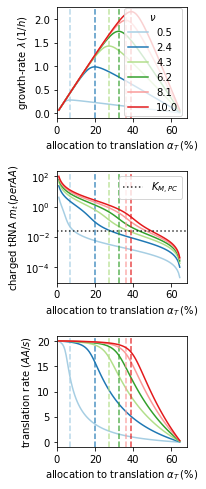

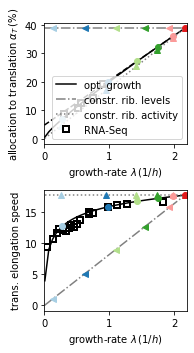

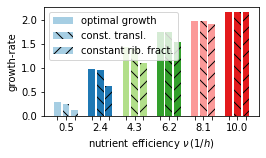

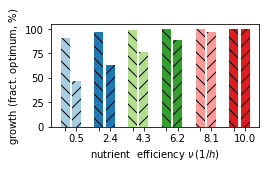

In [9]:
# Plot different nutrient qualifies....how growth is varying with ribosome fraction

#decide which nutrient qualities should be probed


a0v=0.0013*20#
gamma_maxv=20
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65

nul=np.linspace(0.05*nuv,nuv,6)

#prepare figure
fig, axs = plt.subplots(3,1, figsize=(2.8,6.9))

axs[0].set_ylabel("growth-rate $\lambda\, (1/h)$")
axs[1].set_ylabel("charged tRNA $m_{t}\, (per AA)$")
axs[2].set_ylabel("translation rate $(AA/s)$")
rlabel='allocation to translation $\\alpha_T\, (\%)$ '
axs[1].set_xlabel(rlabel)
axs[0].set_xlabel(rlabel)
axs[2].set_xlabel(rlabel)
axs[0].set_xlim(0,(1-phiOv)*1.05*100)
axs[1].set_xlim(0,(1-phiOv)*1.05*100)
axs[2].set_xlim(0,(1-phiOv)*1.05*100)
    
axs[1].set_yscale('log')
colorl=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#go through different nutrient qualities
x=np.linspace(0.01,(1.-phiOv)*0.99,100)

alphRoptl=[]
groptl=[]
proptl=[]
transllist=[]


for il in range(0,nul.shape[0]):
    colorc=colorl[il]
    #get solution vor varying parameters (here phiR)
    nuv=nul[il]
    [grc,pcc,tcc]=grsolution(betav,gamma_maxv,nuv,a0v,phiOv,x,fracactivev)
    #get phiR for optimal growth
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phiOv,fracactivev)
    alphRoptl.append(gropt_alphaR)
    groptl.append(gropt_gr)
    proptl.append(gropt_pc)
    transllist.append(gropt_transl)
    #get phi for pc levels constant
    #avaluev=10.0*a0v
    #pccon_alphaR,pccon_pc,pccon_gr=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv)

    #plot varying growth-rate
    axs[0].plot(x*100,grc,color=colorc,ls='-',label=str(round(nuv,1)))
    
   
    #plot varying pc concentrations
    axs[1].plot(x*100,pcc,color=colorc,ls='-')
    
    
    axs[2].plot(x*100,tcc,color=colorc,ls='-')

    
    #plot growth-optimal case
    axs[0].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    #axs[0].axhline(gropt_gr,ls='--',color=colorc,alpha=alphac)
    axs[1].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    
    axs[2].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    #axs[1].axhline(gropt_pc,ls='--',color=colorc,alpha=alphac)

    #plot case with fixed pcc concentration
    if 3>4:
        axs[0].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[0].axhline(pccon_gr,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axhline(pccon_pc,ls='--',color=colorPCcon,alpha=alphac)

axs[1].axhline(a0v,label='$K_{M,PC}$',ls=':',color=colorPC,alpha=alphac)
axs[0].legend(title='$\\nu$')
axs[1].legend()


plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varnu.pdf")


#now look at growth-optimal solution
fig, axs = plt.subplots(2,1, figsize=(2.8,5))
axs[0].set_xlim(0,2.2)
axs[1].set_xlim(0,2.2)
nuarray=np.linspace(0.01,10,100)
gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuarray,a0v,phiOv,fracactivev)
#ribosome fraction
axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k',label='opt. growth')
#translation
axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')

#offset
fitc=np.polyfit(gropt_gr[int(nuarray.shape[0]/2.):],100*gropt_alphaR[int(nuarray.shape[0]/2.):],1)
xgrr=np.linspace(0,2,20)
axs[0].plot(xgrr,xgrr*fitc[0]+fitc[1],color='k',ls='--')

#plot different nutrient values as examples
for il in range(0,nul.shape[0]):
    axs[0].plot(groptl[il],100*alphRoptl[il],color=colorl[il],marker='o')
#plot transltion rate
    axs[1].plot(groptl[il],transllist[il],color=colorl[il],marker='o')
    
#do the same thing, but look at constant ribosome level

alphRoptc=alphRoptl[-1]

pcconR_alphaR,pcconR_pc,pcconR_gr,pccon_transl=constphiR_solution(betav,gamma_maxv,nuarray,a0v,phiOv,alphRoptc,fracactivev)
axs[0].plot(pcconR_gr,100*pcconR_alphaR,ls='-.',color='gray',label='constr. rib. levels')
axs[1].plot(pcconR_gr,pccon_transl,ls='-.',color='gray')



#alphRconstl=[]
grconstl=[]
#prconstl=[]

for il in range(0,nul.shape[0]):
    pcconR_alphaR,pcconR_pc,pcconR_gr,pccon_transl=constphiR_solution(betav,gamma_maxv,nul[il],a0v,phiOv,alphRoptc,fracactivev)
    axs[0].plot(pcconR_gr,100*pcconR_alphaR,color=colorl[il],marker='<')
    axs[1].plot(pcconR_gr,pccon_transl,color=colorl[il],marker='<')
    grconstl.append(pcconR_gr)
    


#do the same thing, but what happens when ribosome activity is not changing
avaluec=proptl[-1]

#alphRconstactl=[]
grconstactl=[]
#prconstactl=[]


pccon_alphaR,pccon_pc,pccon_gr,pccon_transl=constPCsolution(betav,gamma_maxv,nuarray,a0v,avaluec,phiOv,fracactivev)
axs[0].plot(pccon_gr,100*pccon_alphaR,ls=':',color='gray',label='constr. rib. activity')
axs[1].plot(pccon_gr,pccon_transl,ls=':',color='gray')

for il in range(0,nul.shape[0]):
    pccon_alphaR,pccon_pc,pccon_gr,pccon_transl=constPCsolution(betav,gamma_maxv,nul[il],a0v,avaluec,phiOv,fracactivev)
    axs[0].plot(pccon_gr,100*pccon_alphaR,color=colorl[il],marker='^')
    axs[1].plot(pccon_gr,pccon_transl,color=colorl[il],marker='^')
    grconstactl.append(pccon_gr)
  
axs[0].set_ylabel(rlabel)
axs[0].set_xlabel("growth-rate $\lambda\, (1/h)$")
axs[1].set_ylabel('trans. elongation speed')
axs[1].set_xlabel("growth-rate $\lambda\, (1/h)$")

if 3>2:
    #fit Mori et al. 
    grr=np.linspace(0,2,100)
    #axs[0].plot(grr,0.0967+0.2206*grr,color='r',label='Mori et al',alpha=0.5)
    #axs[1,0].plot(,color='r',label='observ transl.')
    #take data from RNAseq (c limitation)
    grdatac=np.array([0.91,0.75, 0.56, 0.51, 0.3 ])
    ribosabundanc=np.array([19.18590608, 14.22365961, 12.50443378, 10.73007257,  8.74428159])/100.
    axs[0].plot(grdatac,100*ribosabundanc,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='RNA-Seq',zorder=-1)
    #fitc=np.polyfit(grdatac,ribosabundanc,1)
    #grrc=np.linspace(0,2,100)
    #axs[0].plot(grrc,100*(grrc*fitc[0]+fitc[1]),color='r',label='RNA-seq',alpha=0.5)
    
if 3>2:#TRANSLATION SPEED - DAI AT AL.
        grdatac=np.array([1.83,1.28,1.12,0.98,0.75,0.69,0.69,0.55,0.5,0.46,0.41,0.34,0.38,0.33,0.29,0.2,0.23,0.13,0.035])
        elongr=np.array([16.7,16.3,16.1,15.9,14.9,15,14.7,13.7,13.1,12.6,13,12.4,12.4,12,12.1,11.6,12.3,10.7,9.4])
        axs[1].plot(grdatac,elongr,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='Dai et al',zorder=-1)
        
     

axs[0].legend()
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varnu_opt.pdf")

#make a bar diagram with different growth-rates

#constant ribosomes
fig, axs = plt.subplots(1,1, figsize=(3.8,2.3))

barc=[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23]
axs.set_xticks(barc)
axs.set_xticklabels(["",str(nul[0]),"","",str(nul[1]),"","",str(nul[2]),"","",str(round(nul[3],2)),"","",str(nul[4]),"","",str(nul[5]),""])
barcc=-1
for il in range(0,6):
    if il==0:
        labelc="optimal growth"
    else:
        labelc=None
    barcc=barcc+1
    axs.bar(barc[barcc],groptl[il],color=colorl[il],label=labelc)
    barcc=barcc+1
    if il==0:
        labelc="const. transl."
    else:
        labelc=None
    axs.bar(barc[barcc],grconstactl[il],hatch='\\\\',color=colorl[il],label=labelc)
    
    barcc=barcc+1
    if il==0:
        labelc="constant rib. fract."
    else:
        labelc=None
    axs.bar(barc[barcc],grconstl[il],hatch='//',color=colorl[il],label=labelc)

    
axs.set_ylabel("growth-rate")
axs.set_xlabel("nutrient efficiency $\\nu\, (1/h)$")
axs.legend()
plt.tight_layout()
plt.savefig("plot_output/bardiagram_differences.pdf")


#constant ribosomes
fig, axs = plt.subplots(1,1, figsize=(3.8,2.3))

barc=[1,2,4,5,7,8,10,11,13,14,16,17]
axs.set_xticks(barc)
axs.set_xticklabels(["",str(nul[0]),"",str(nul[1]),"",str(nul[2]),"",str(round(nul[3],2)),"",str(nul[4]),"",str(nul[5])])
barcc=-1
for il in range(0,6):
    barcc=barcc+1
    if il==0:
        labelc="const. transl."
    else:
        labelc=None
    axs.bar(barc[barcc],100*grconstactl[il]/groptl[il],hatch='\\\\',color=colorl[il],label=labelc)
    
    barcc=barcc+1
    if il==0:
        labelc="constant rib. fract."
    else:
        labelc=None
    axs.bar(barc[barcc],100*grconstl[il]/groptl[il],hatch='//',color=colorl[il],label=labelc)

axs.set_ylabel("growth (fract. optimum, $\%$)")
axs.set_xlabel("nutrient  efficiency $\\nu\, (1/h)$")
#axs.legend()
plt.tight_layout()
plt.savefig("plot_output/bardiagram_differences_fraction.pdf")




# Variation fraction other 

No handles with labels found to put in legend.


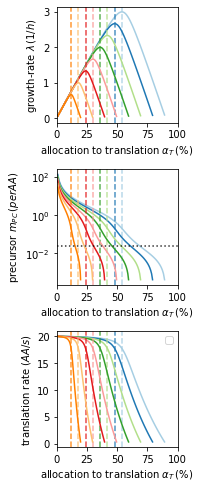

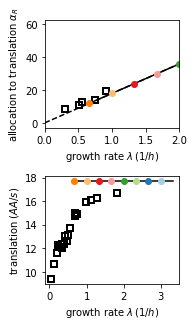

In [10]:
# Plot different nutrient qualifies....how growth is varying with ribosome fraction
#decide which nutrient qualities should be probed

a0v=0.0013*20#
gamma_maxv=20
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65

phiOvl=np.linspace(0.1,0.8,8)

#prepare figure
fig, axs = plt.subplots(3,1, figsize=(2.8,6.9))
axs[0].set_ylabel("growth-rate $\lambda\, (1/h)$")
axs[1].set_ylabel("precursor $m_{PC}\, (per AA)$")
axs[2].set_ylabel("translation rate $(AA/s)$")
rlabel='allocation to translation $\\alpha_T\, (\%)$ '
axs[1].set_xlabel(rlabel)
axs[0].set_xlabel(rlabel)
axs[2].set_xlabel(rlabel)
axs[0].set_xlim(0,100)
axs[1].set_xlim(0,100)
axs[2].set_xlim(0,100)
axs[1].set_yscale('log')
colorl=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#go through different nutrient qualities


alphRoptl=[]
groptl=[]
proptl=[]
gropt_translist=[]
for il in range(0,phiOvl.shape[0]):
    colorc=colorl[il]
    x=np.linspace(0.01,(1-phiOvl[il])*0.99,100)
    #get solution vor varying parameters (here phiR)
    phiOv=phiOvl[il]
    [grc,pcc,tcc]=grsolution(betav,gamma_maxv,nuv,a0v,phiOv,x,fracactivev)
    #get phiR for optimal growth
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phiOv,fracactivev)
    alphRoptl.append(gropt_alphaR)
    groptl.append(gropt_gr)
    proptl.append(gropt_pc)
    gropt_translist.append(gropt_transl)


    #get phi for pc levels constant
    #avaluev=10.0*a0v
    #pccon_alphaR,pccon_pc,pccon_gr=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv)

    #plot varying growth-rate
    axs[0].plot(100*x,grc,color=colorc,ls='-')
    #plot varying pc concentrations
    axs[1].plot(100*x,pcc,color=colorc,ls='-')
    axs[2].plot(100*x,tcc,color=colorc,ls='-')
    
    #plot growth-optimal case
    axs[0].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    axs[1].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    axs[2].axvline(100*gropt_alphaR,ls='--',color=colorc,alpha=alphac)
    
    #plot case with fixed pcc concentration
    if 3>4:
        axs[0].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[0].axhline(100*pccon_gr,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axhline(100*pccon_pc,ls='--',color=colorPCcon,alpha=alphac)
        
    


axs[1].axhline(a0v,label='$K_{M,PC}$',ls=':',color=colorPC,alpha=alphac)
plt.legend()
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varother.pdf")

#now look at growth-optimal solution
fig, axs = plt.subplots(2,1, figsize=(2.8,4.6))
axs[0].set_xlim(0,2)


phi0array=np.linspace(0.,0.8,100)
gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phi0array,fracactivev)
#ribosome fraction
axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k')
#translation
axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')

#offset
fitc=np.polyfit(gropt_gr[int(phi0array.shape[0]/2.):],100*gropt_alphaR[int(phi0array.shape[0]/2.):],1)
xgrr=np.linspace(0,2,20)
axs[0].plot(xgrr,xgrr*fitc[0]+fitc[1],color='k',ls='--')

#plot different nutrient values as examples
for il in range(0,phiOvl.shape[0]):
    axs[0].plot(groptl[il],100*alphRoptl[il],color=colorl[il],marker='o')
#plot transltion rate
    axs[1].plot(groptl[il],gropt_translist[il],color=colorl[il],marker='o')

axs[0].set_ylabel('allocation to translation $\\alpha_R$')
axs[0].set_xlabel("growth rate $\lambda\, (1/h)$")

axs[1].set_ylabel('translation $(AA/s)$')
axs[1].set_xlabel("growth rate $\lambda\, (1/h)$")

if 3>2:
    #fit Mori at al. 
    grr=np.linspace(0,2,100)
    #axs[0].plot(grr,0.0967+0.2206*grr,color='r',label='Mori et al',alpha=0.5)
    #axs[1,0].plot(,color='r',label='observ transl.')
    #take data from RNAseq (c limitation)
    grdatac=np.array([0.91,0.75, 0.56, 0.51, 0.3 ])
    ribosabundanc=np.array([19.18590608, 14.22365961, 12.50443378, 10.73007257,  8.74428159])/100.
    axs[0].plot(grdatac,100*ribosabundanc,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='RNA-Seq',zorder=-1)
    #fitc=np.polyfit(grdatac,ribosabundanc,1)
    #grrc=np.linspace(0,2,100)
    #axs[0].plot(grrc,100*(grrc*fitc[0]+fitc[1]),color='r',label='RNA-seq',alpha=0.5)
    
if 3>2:#TRANSLATION SPEED - DAI AT AL.
        grdatac=np.array([1.83,1.28,1.12,0.98,0.75,0.69,0.69,0.55,0.5,0.46,0.41,0.34,0.38,0.33,0.29,0.2,0.23,0.13,0.035])
        elongr=np.array([16.7,16.3,16.1,15.9,14.9,15,14.7,13.7,13.1,12.6,13,12.4,12.4,12,12.1,11.6,12.3,10.7,9.4])
        axs[1].plot(grdatac,elongr,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='Dai et al',zorder=-1)
        
     
    
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varother_opt.pdf")

# Variaton of both, nutrient efficiency and other proteome fraction

[0.7    0.6125 0.525  0.4375 0.35   0.35   0.35   0.35  ]


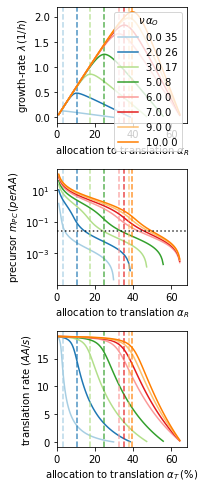

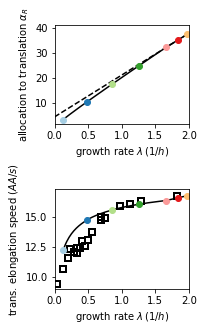

In [11]:
# Plot different nutrient qualifies....how growth is varying with ribosome fraction

#decide which nutrient qualities should be probed
a0v=0.0013*20#
gamma_maxv=19
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65

#phiOv=0.3

#fit transporter genes
#[-14.83514886  21.28571246]
#fit motility genes
#[-11.6321223   15.79293438]

phiOvl=np.linspace(0.35,0.7,5)[::-1]
phiOvl=np.append(phiOvl,np.array([0.35]*3))
print(phiOvl)

nul=np.linspace(0.05*nuv,10,8)

#prepare figure
fig, axs = plt.subplots(3,1, figsize=(2.8,6.9))
axs[0].set_ylabel("growth-rate $\lambda\, (1/h)$")
axs[1].set_ylabel("charged tRNA $m_{PC}\, (per AA)$")
axs[2].set_ylabel("translation rate $(AA/s)$")
rlabel='allocation to translation $\\alpha_T\, (\%)$ '
axs[1].set_xlabel(rlabel)
axs[0].set_xlabel(rlabel)
axs[2].set_xlabel(rlabel)
axs[0].set_xlim(0,100*(1-phiOvl[-1])*1.05)
axs[1].set_xlim(0,100*(1-phiOvl[-1])*1.05)
axs[2].set_xlim(0,100*(1-phiOvl[-1])*1.05)
axs[1].set_yscale('log')
colorl=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#go through different nutrient qualities


alphRoptl=[]
groptl=[]
proptl=[]
gropt_translist=[]
for il in range(0,phiOvl.shape[0]):
    colorc=colorl[il]
    x=np.linspace(0.01,(1-phiOvl[il])*0.99,100)
    #get solution vor varying parameters (here phiR)
    phiOv=phiOvl[il]
    nuv=nul[il]
    [grc,pcc,tcc]=grsolution(betav,gamma_maxv,nuv,a0v,phiOv,x,fracactivev)
    #get phiR for optimal growth
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phiOv,fracactivev)
    alphRoptl.append(gropt_alphaR)
    groptl.append(gropt_gr)
    proptl.append(gropt_pc)
    gropt_translist.append(gropt_transl)
    #get phi for pc levels constant
    #avaluev=10.0*a0v
    #pccon_alphaR,pccon_pc,pccon_gr=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv)

    #plot varying growth-rate
    axs[0].plot(x*100,grc,color=colorc,ls='-',label=str(round(nuv))+" "+str(int((phiOv-phiOvl[-1])*100)))
    axs[0].set_xlabel('allocation to translation $\\alpha_R$')
    axs[0].set_ylabel("growth-rate $\lambda\, (1/h)$")

    #plot varying pc concentrations
    axs[1].plot(x*100,pcc,color=colorc,ls='-')
    axs[1].set_xlabel('allocation to translation $\\alpha_R$')
    axs[1].set_ylabel("precursor $m_{PC}\, (per AA)$")

    #plot growth-optimal case
    axs[0].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    #axs[0].axhline(gropt_gr,ls='--',color=colorc,alpha=alphac)
    axs[1].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    axs[2].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    axs[2].plot(x*100,tcc,color=colorc,ls='-')
    #axs[1].axhline(gropt_pc,ls='--',color=colorc,alpha=alphac)

    #plot case with fixed pcc concentration
    if 3>4:
        axs[0].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        #axs[0].axhline(pccon_gr,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        #axs[1].axhline(pccon_pc,ls='--',color=colorPCcon,alpha=alphac)

axs[1].axhline(a0v,label='$K_{M,PC}$',ls=':',color=colorPC,alpha=alphac)
axs[0].legend(title='$\\nu\, \\alpha_O$')
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varboth.pdf")

#now look at growth-optimal solution
fig, axs = plt.subplots(2,1, figsize=(2.8,4.6))
axs[0].set_xlim(0,2)
axs[1].set_xlim(0,2)
#axs[1].set_ylim(0,1)

#phiOvl
#phi0array=np.linspace(phiOvl[-1],phiOvl[0],160)[::-1]
for ill in range(0,len(phiOvl)-1):
    if ill==0:
        phi0array=np.linspace(phiOvl[ill],phiOvl[ill+1],20)
    else:
        phi0array=np.append(phi0array,np.linspace(phiOvl[ill],phiOvl[ill+1],20))
nuarray=np.linspace(nul[0],nul[-1],140)

gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuarray,a0v,phi0array,fracactivev)
#ribosome fraction
axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k')
#translation
axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')

#offset
fitc=np.polyfit(gropt_gr[int(gropt_gr.shape[0]/2.):],100*gropt_alphaR[int(gropt_gr.shape[0]/2.):],1)
xgrr=np.linspace(0,2,20)
axs[0].plot(xgrr,xgrr*fitc[0]+fitc[1],color='k',ls='--')

#plot different nutrient values as examples
for il in range(0,phiOvl.shape[0]):
    axs[0].plot(groptl[il],100*alphRoptl[il],color=colorl[il],marker='o')
    #axs[0].plot(groptl[il],100*(phiOvl[il]-phiOvl[-1]),color=colorl[il],marker='^')
#plot transltion rate
    axs[1].plot(groptl[il],gropt_translist[il],color=colorl[il],marker='o')

axs[0].set_ylabel('allocation to translation $\\alpha_R$')
axs[0].set_xlabel("growth rate $\lambda\, (1/h)$")

if 3>2:
    #fit transporter genes and motility genes (2nd part)
    xrgc=np.linspace(0,2)
    #axs[0].plot(xrgc,-14.83514886*xrgc+21.28571246-11.6321223*xrgc+15.79293438,color='m')
    
    
    #fit motility genes

if 3>2:
    #fit Mori at al. 
    grr=np.linspace(0,2,100)
    #axs[0].plot(grr,0.0967+0.2206*grr,color='r',label='Mori et al',alpha=0.5)
    #axs[1,0].plot(,color='r',label='observ transl.')
    #take data from RNAseq (c limitation)
    grdatac=np.array([0.91,0.75, 0.56, 0.51, 0.3 ])
    ribosabundanc=np.array([19.18590608, 14.22365961, 12.50443378, 10.73007257,  8.74428159])/100.
    #axs[0].plot(grdatac,100*ribosabundanc,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='RNA-Seq',zorder=-1)
    #fitc=np.polyfit(grdatac,ribosabundanc,1)
    #grrc=np.linspace(0,2,100)
    #axs[0].plot(grrc,100*(grrc*fitc[0]+fitc[1]),color='r',label='RNA-seq',alpha=0.5)
    
if 3>2:#TRANSLATION SPEED - DAI AT AL.
        grdatac=np.array([1.83,1.28,1.12,0.98,0.75,0.69,0.69,0.55,0.5,0.46,0.41,0.34,0.38,0.33,0.29,0.2,0.23,0.13,0.035])
        elongr=np.array([16.7,16.3,16.1,15.9,14.9,15,14.7,13.7,13.1,12.6,13,12.4,12.4,12,12.1,11.6,12.3,10.7,9.4])
        axs[1].plot(grdatac,elongr,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='Dai et al',zorder=-1)
        
     

    
axs[1].set_ylabel('trans. elongation speed $(AA/s)$')
axs[1].set_xlabel("growth rate $\lambda\, (1/h)$")

plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_varboth_opt.pdf")

# Variation translation rate

No handles with labels found to put in legend.
/Users/jonascremer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


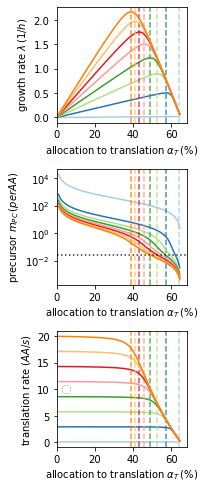

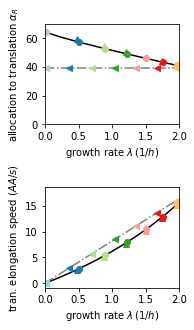

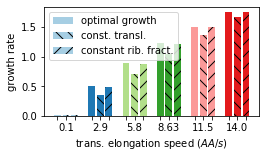

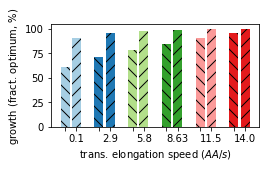

In [10]:
# Plot different nutrient qualifies....how growth is varying with ribosome fraction
#decide which nutrient qualities should be probed

a0v=0.0013*20#
gamma_maxv=20
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65
gamma_maxvl=np.linspace(0.1,20.,8)


#prepare figure
fig, axs = plt.subplots(3,1, figsize=(2.8,6.9))
axs[0].set_ylabel("growth rate $\lambda\, (1/h)$")
axs[1].set_ylabel("precursor $m_{PC}\, (per AA)$")
axs[2].set_ylabel("translation rate $(AA/s)$")
rlabel='allocation to translation $\\alpha_T\, (\%)$ '
axs[1].set_xlabel(rlabel)
axs[0].set_xlabel(rlabel)
axs[2].set_xlabel(rlabel)
axs[0].set_xlim(0,100*(1-phiOv)*1.05)
axs[1].set_xlim(0,100*(1-phiOv)*1.05)
axs[2].set_xlim(0,100*(1-phiOv)*1.05)
axs[1].set_yscale('log')
colorl=['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
#go through different nutrient qualities


alphRoptl=[]
groptl=[]
proptl=[]
gropt_transllist=[]
for il in range(0,gamma_maxvl.shape[0]):
    colorc=colorl[il]
    x=np.linspace(0.01,(1.-phiOv)*0.99,100)
    #get solution vor varying parameters (here phiR)
    [grc,pcc,tcc]=grsolution(betav,gamma_maxvl[il],nuv,a0v,phiOv,x,fracactivev)
    #get phiR for optimal growth
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxvl[il],nuv,a0v,phiOv,fracactivev)
    alphRoptl.append(gropt_alphaR)
    groptl.append(gropt_gr)
    proptl.append(gropt_pc)
    gropt_transllist.append(gropt_transl)
    #get phi for pc levels constant
    #avaluev=10.0*a0v
    #pccon_alphaR,pccon_pc,pccon_gr=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv)

    #plot varying growth-rate
    axs[0].plot(x*100,grc,color=colorc,ls='-')

    #plot varying pc concentrations
    axs[1].plot(x*100,pcc,color=colorc,ls='-')


    axs[2].plot(x*100,tcc,color=colorc,ls='-')
    
    #plot growth-optimal case
    axs[0].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    axs[1].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    axs[2].axvline(gropt_alphaR*100,ls='--',color=colorc,alpha=alphac)
    
    #plot case with fixed pcc concentration
    if 3>4:
        axs[0].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[0].axhline(pccon_gr,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axvline(pccon_alphaR,ls='--',color=colorPCcon,alpha=alphac)
        axs[1].axhline(pccon_pc,ls='--',color=colorPCcon,alpha=alphac)

axs[1].axhline(a0v,label='$K_{M,PC}$',ls=':',color=colorPC,alpha=alphac)
plt.legend()
plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_vartransl.pdf")

#now look at growth-optimal solution
fig, axs = plt.subplots(2,1, figsize=(2.8,4.6))
axs[0].set_xlim(0,2)
axs[1].set_xlim(0,2)

gammaarray=np.linspace(0.,gamma_maxv,100)
gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gammaarray,nuv,a0v,phiOv,fracactivev)
#ribosome fraction
axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k')
#translation
axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')

#linear fit
#fitc=np.polyfit(gropt_gr[int(phiarray.shape[0]/2.):],gropt_alphaR[int(phiarray.shape[0]/2.):],1)
#xgrr=np.linspace(0,2,20)
#axs[0].plot(xgrr,xgrr*fitc[0]+fitc[1],color='k',ls='--')

#plot different nutrient values as examples
for il in range(0,gamma_maxvl.shape[0]):
    axs[0].plot(groptl[il],100*alphRoptl[il],color=colorl[il],marker='o')
#plot transltion rate
    axs[1].plot(groptl[il],gropt_transllist[il],color=colorl[il],marker='o')
    

#do the same thing, but look at constant ribosome level
alphRoptc=alphRoptl[-1]
pcconR_alphaR,pcconR_pc,pcconR_gr,pcconR_tr=constphiR_solution(betav,gammaarray,nuv,a0v,phiOv,alphRoptc,fracactivev)
axs[0].plot(pcconR_gr,100*pcconR_alphaR,ls='-.',color='gray')
axs[1].plot(pcconR_gr,pcconR_tr,ls='-.',color='gray')

grconstactl=[]
for il in range(0,gamma_maxvl.shape[0]):
    pcconR_alphaR,pcconR_pc,pcconR_gr,pcconR_transl=constphiR_solution(betav,gamma_maxvl[il],nuv,a0v,phiOv,alphRoptc,fracactivev)
    axs[0].plot(pcconR_gr,100*pcconR_alphaR,color=colorl[il],marker='<')
    axs[1].plot(pcconR_gr,pcconR_transl,color=colorl[il],marker='<')
    grconstactl.append(pcconR_gr)
    
#do the same thing, but what happens when ribosome activity is not changing
avaluec=proptl[-1]

if 3>2:
    pccon_alphaR,pccon_pc,pccon_gr,pccon_transl=constPCsolution(betav,gammaarray,nuv,a0v,avaluec,phiOv,fracactivev)
    #axs[0].plot(pccon_gr,100*pccon_alphaR,ls=':',color='gray')
    #axs[1].plot(pccon_gr,pccon_transl,ls=':',color='gray')
    grconstl=[]
    for il in range(0,gamma_maxvl.shape[0]):
        pccon_alphaR,pccon_pc,pccon_gr,pccon_transl=constPCsolution(betav,gamma_maxvl[il],nuv,a0v,avaluec,phiOv,fracactivev)
        axs[0].plot(pccon_gr,100*pccon_alphaR,color=colorl[il],marker='^')
        axs[1].plot(pccon_gr,pccon_transl,color=colorl[il],marker='^')
        grconstl.append(pccon_gr)
axs[0].set_ylabel('allocation to translation $\\alpha_R$')
axs[0].set_xlabel("growth rate $\lambda\, (1/h)$")

axs[1].set_ylabel('tran. elongation speed $(AA/s)$')
axs[1].set_xlabel("growth rate $\lambda\, (1/h)$")
axs[0].set_ylim(0,70)

plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_vartrans_opt.pdf")


####


#constant ribosomes
fig, axs = plt.subplots(1,1, figsize=(3.8,2.3))

barc=[1,2,3,5,6,7,9,10,11,13,14,15,17,18,19,21,22,23]
axs.set_xticks(barc)
labelll=["",str(round(gamma_maxvl[0],1)),"","",str(round(gamma_maxvl[1],1)),"","",str(round(gamma_maxvl[2],1)),"","",str(round(gamma_maxvl[3],2)),"","",str(round(gamma_maxvl[4],1)),"","",str(round(gamma_maxvl[5],))]

axs.set_xticklabels(labelll)

barcc=-1
for il in range(0,6):
    if il==0:
        labelc="optimal growth"
    else:
        labelc=None
    barcc=barcc+1
    axs.bar(barc[barcc],groptl[il],color=colorl[il],label=labelc)
    barcc=barcc+1
    if il==0:
        labelc="const. transl."
    else:
        labelc=None
    axs.bar(barc[barcc],grconstactl[il],hatch='\\\\',color=colorl[il],label=labelc)
    
    barcc=barcc+1
    if il==0:
        labelc="constant rib. fract."
    else:
        labelc=None
    axs.bar(barc[barcc],grconstl[il],hatch='//',color=colorl[il],label=labelc)

    
axs.set_ylabel("growth rate")
axs.set_xlabel("trans. elongation speed $(AA/s)$")
axs.legend()
plt.tight_layout()
plt.savefig("plot_output/bardiagram_differences_trans.pdf")




#constant ribosomes
fig, axs = plt.subplots(1,1, figsize=(3.8,2.3))

barc=[1,2,4,5,7,8,10,11,13,14,16,17]
axs.set_xticks(barc)
labelll=["",str(round(gamma_maxvl[0],1)),"",str(round(gamma_maxvl[1],1)),"",str(round(gamma_maxvl[2],1)),"",str(round(gamma_maxvl[3],2)),"",str(round(gamma_maxvl[4],1)),"",str(round(gamma_maxvl[5],))]


axs.set_xticklabels(labelll)

barcc=-1
for il in range(0,6):
    barcc=barcc+1
    if il==0:
        labelc="constant ribo. fract."
    else:
        labelc=None
    axs.bar(barc[barcc],100*grconstactl[il]/groptl[il],hatch='\\\\',color=colorl[il],label=labelc)
    
    barcc=barcc+1
    if il==0:
        labelc="const. tRNA levels"
    else:
        labelc=None
    axs.bar(barc[barcc],100*grconstl[il]/groptl[il],hatch='//',color=colorl[il],label=labelc)

axs.set_ylabel("growth (fract. optimum, $\%$)")
axs.set_xlabel("trans. elongation speed $(AA/s)$")
#axs.legend()
plt.tight_layout()
plt.savefig("plot_output/bardiagram_differences_fraction_trans.pdf")





/Users/jonascremer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/jonascremer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/jonascremer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/jonascremer/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


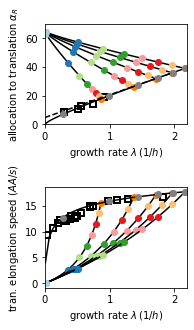

In [11]:
#variation translation rate for different nutrient qualities

# Plot different nutrient qualifies....how growth is varying with ribosome fraction
#decide which nutrient qualities should be probed

a0v=0.0013*20#
gamma_maxv=20
betav=1
nuv=10
phiOv=0.35
fracactivev=0.65
gamma_maxvl=np.linspace(0.1,20.,8)


fig, axs = plt.subplots(2,1, figsize=(2.8,4.6))
axs[0].set_xlim(0,2.2)
axs[1].set_xlim(0,2.2)

for nuv in [2,4,6,8,10]:

    alphRoptl=[]
    groptl=[]
    proptl=[]
    gropt_transllist=[]
    for il in range(0,gamma_maxvl.shape[0]):
        colorc=colorl[il]
        x=np.linspace(0.01,(1.-phiOv)*0.99,100)
        #get solution vor varying parameters (here phiR)
        [grc,pcc,tcc]=grsolution(betav,gamma_maxvl[il],nuv,a0v,phiOv,x,fracactivev)
        #get phiR for optimal growth
        gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxvl[il],nuv,a0v,phiOv,fracactivev)
        alphRoptl.append(gropt_alphaR)
        groptl.append(gropt_gr)
        proptl.append(gropt_pc)
        gropt_transllist.append(gropt_transl)
        #get phi for pc levels constant
        #avaluev=10.0*a0v
        #pccon_alphaR,pccon_pc,pccon_gr=constPCsolution(betav,gamma_maxv,nuv,a0v,avaluev,phiOv)

    #now look at growth-optimal solution

    gammaarray=np.linspace(0.,gamma_maxv,100)
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gammaarray,nuv,a0v,phiOv,fracactivev)
    #ribosome fraction
    axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k')
    #translation
    axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')


    #plot different nutrient values as examples
    for il in range(0,gamma_maxvl.shape[0]):
        axs[0].plot(groptl[il],100*alphRoptl[il],color=colorl[il],marker='o')
        #plot transltion rate
        axs[1].plot(groptl[il],gropt_transllist[il],color=colorl[il],marker='o')
    

    
    
###############################
#now do same thing for varying nutrient quality more smoothling
################################


nul=np.linspace(0.05*nuv,nuv,6)

x=np.linspace(0.01,(1.-phiOv)*0.99,100)

alphRoptl=[]
groptl=[]
proptl=[]
transllist=[]


for il in range(0,nul.shape[0]):
    colorc=colorl[il]
    #get solution vor varying parameters (here phiR)
    nuv=nul[il]
    [grc,pcc,tcc]=grsolution(betav,gamma_maxv,nuv,a0v,phiOv,x,fracactivev)
    #get phiR for optimal growth
    gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuv,a0v,phiOv,fracactivev)
    alphRoptl.append(gropt_alphaR)
    groptl.append(gropt_gr)
    proptl.append(gropt_pc)
    transllist.append(gropt_transl)
    

#now look at growth-optimal solution
nuarray=np.linspace(0.01,10,100)
gropt_alphaR,gropt_pc,gropt_gr,gropt_transl=optphiR_solution(betav,gamma_maxv,nuarray,a0v,phiOv,fracactivev)
#ribosome fraction
axs[0].plot(gropt_gr,100*gropt_alphaR,ls='-',color='k',label='opt. growth')
#translation
axs[1].plot(gropt_gr,gropt_transl,ls='-',color='k')

#offset
fitc=np.polyfit(gropt_gr[int(nuarray.shape[0]/2.):],100*gropt_alphaR[int(nuarray.shape[0]/2.):],1)
xgrr=np.linspace(0,2,20)
axs[0].plot(xgrr,xgrr*fitc[0]+fitc[1],color='k',ls='--')

#plot different nutrient values as examples
for il in range(0,nul.shape[0]):
    axs[0].plot(groptl[il],100*alphRoptl[il],color='gray',marker='o')
    axs[1].plot(groptl[il],transllist[il],color='gray',marker='o')
    

if 3>2:
    #fit Mori at al. 
    grr=np.linspace(0,2,100)
    #axs[0].plot(grr,0.0967+0.2206*grr,color='r',label='Mori et al',alpha=0.5)
    #axs[1,0].plot(,color='r',label='observ transl.')
    #take data from RNAseq (c limitation)
    grdatac=np.array([0.91,0.75, 0.56, 0.51, 0.3 ])
    ribosabundanc=np.array([19.18590608, 14.22365961, 12.50443378, 10.73007257,  8.74428159])/100.
    axs[0].plot(grdatac,100*ribosabundanc,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='RNA-Seq',zorder=-1)
    #fitc=np.polyfit(grdatac,ribosabundanc,1)
    #grrc=np.linspace(0,2,100)
    #axs[0].plot(grrc,100*(grrc*fitc[0]+fitc[1]),color='r',label='RNA-seq',alpha=0.5)
    
if 3>2:#TRANSLATION SPEED - DAI AT AL.
        grdatac=np.array([1.83,1.28,1.12,0.98,0.75,0.69,0.69,0.55,0.5,0.46,0.41,0.34,0.38,0.33,0.29,0.2,0.23,0.13,0.035])
        elongr=np.array([16.7,16.3,16.1,15.9,14.9,15,14.7,13.7,13.1,12.6,13,12.4,12.4,12,12.1,11.6,12.3,10.7,9.4])
        axs[1].plot(grdatac,elongr,marker='s',ls='',markeredgewidth=2,markeredgecolor='k',markerfacecolor='None',label='Dai et al',zorder=-1)




################
#finish plotting
################
    
axs[0].set_ylabel('allocation to translation $\\alpha_R$')
axs[0].set_xlabel("growth rate $\lambda\, (1/h)$")

axs[1].set_ylabel('tran. elongation speed $(AA/s)$')
axs[1].set_xlabel("growth rate $\lambda\, (1/h)$")
axs[0].set_ylim(0,70)

plt.tight_layout()
plt.savefig("plot_output/growthrate_vs_alpha_vartrans_opt_diffnu.pdf")


